In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

In [2]:

white_wine_dataset = pd.read_csv('winequality-white.csv', sep =';')
red_wine_dataset = pd.read_csv('winequality-red.csv', sep =';')

#adding an attribute wine type

white_wine_dataset['wine_type'] = 'white'
red_wine_dataset['wine_type'] = 'red'



In [3]:

#Categorize the a new columns determining based on value

wines = pd.concat([red_wine_dataset,white_wine_dataset])

wines['quality_label'] = wines['quality'].apply(lambda value: 'low'
                  if value <= 5 else 'medium'
                   if value <= 7 else 'high')

wines['quality_label'] = pd.Categorical(wines['quality_label'],
                             categories = ['low','medium','high'])


# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


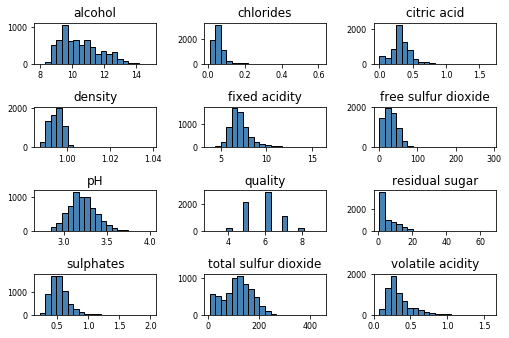

In [4]:

subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine_dataset[subset_attributes].describe(),2)
ws = round(white_wine_dataset[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])


#histograms 1-D representation
wines.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

## Histogram:

use pyplot to create the histogram
set label :- ax.set_xlabel
add text at a particular postion -- ax.text() -- 


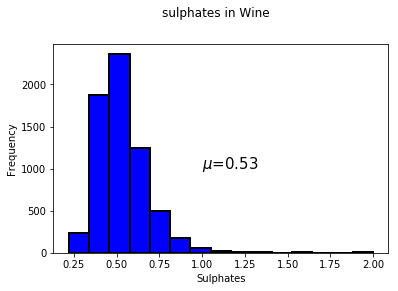

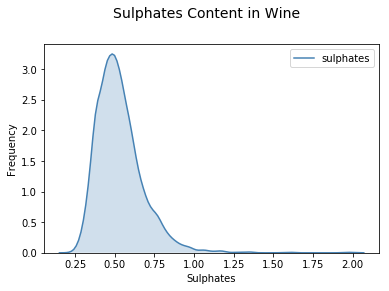

In [9]:
#create an object of the histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("sulphates in Wine")
#wspace -- gap between subplots
fig.subplots_adjust(top = 0.85, wspace = 0.3)

#add_subplot -- takes the position with (R - rows,C - columns ,P - position)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency")

#Assigning a value on the graph at the position x =1, y = 800
ax.text(1,1000, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), fontsize = 15)

#draw the graph
freq, bins, patches = ax.hist(wines['sulphates'],color = 'blue', bins = 15,
                              edgecolor = 'black',linewidth = 2)



## Density Plot
ploty usin the seaborn
kdeplot 

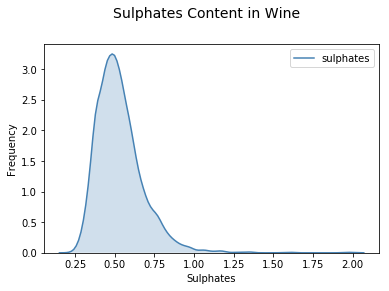

In [8]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

## Bar Plots
using pyplots

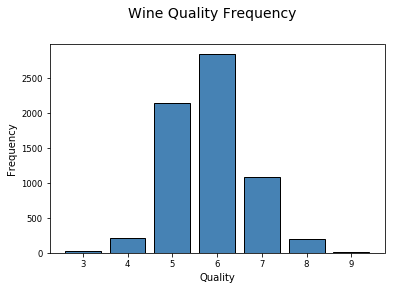

In [10]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

## Heat Maps
.corr() -- provides the correlation between the variables

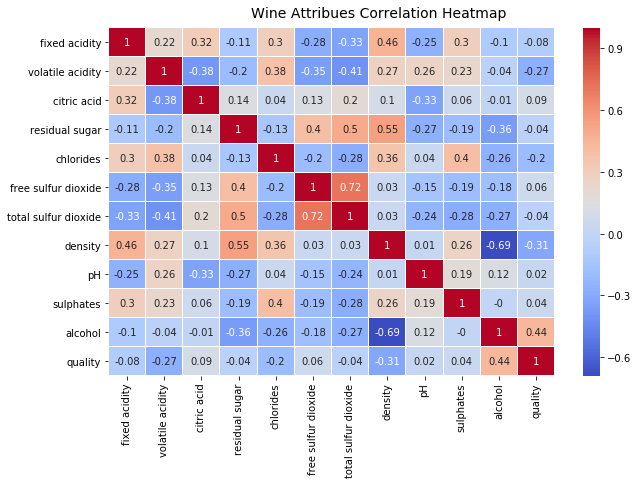

In [12]:
#Heat maps
f,ax = plt.subplots(figsize = (10,6))

# correlation between all the variables
corr = wines.corr()
corr

hm = sns.heatmap(round(corr,2),
                 annot = True,
                 ax = ax,
                 cmap = "coolwarm",
                 fmt = '.2f',
                 linewidths = .05)
f.subplots_adjust(top = 0.93)
t= f.suptitle('Wine Attribues Correlation Heatmap', fontsize = 14)


## Pair-wise scatter plot
use seaborn.pairplot

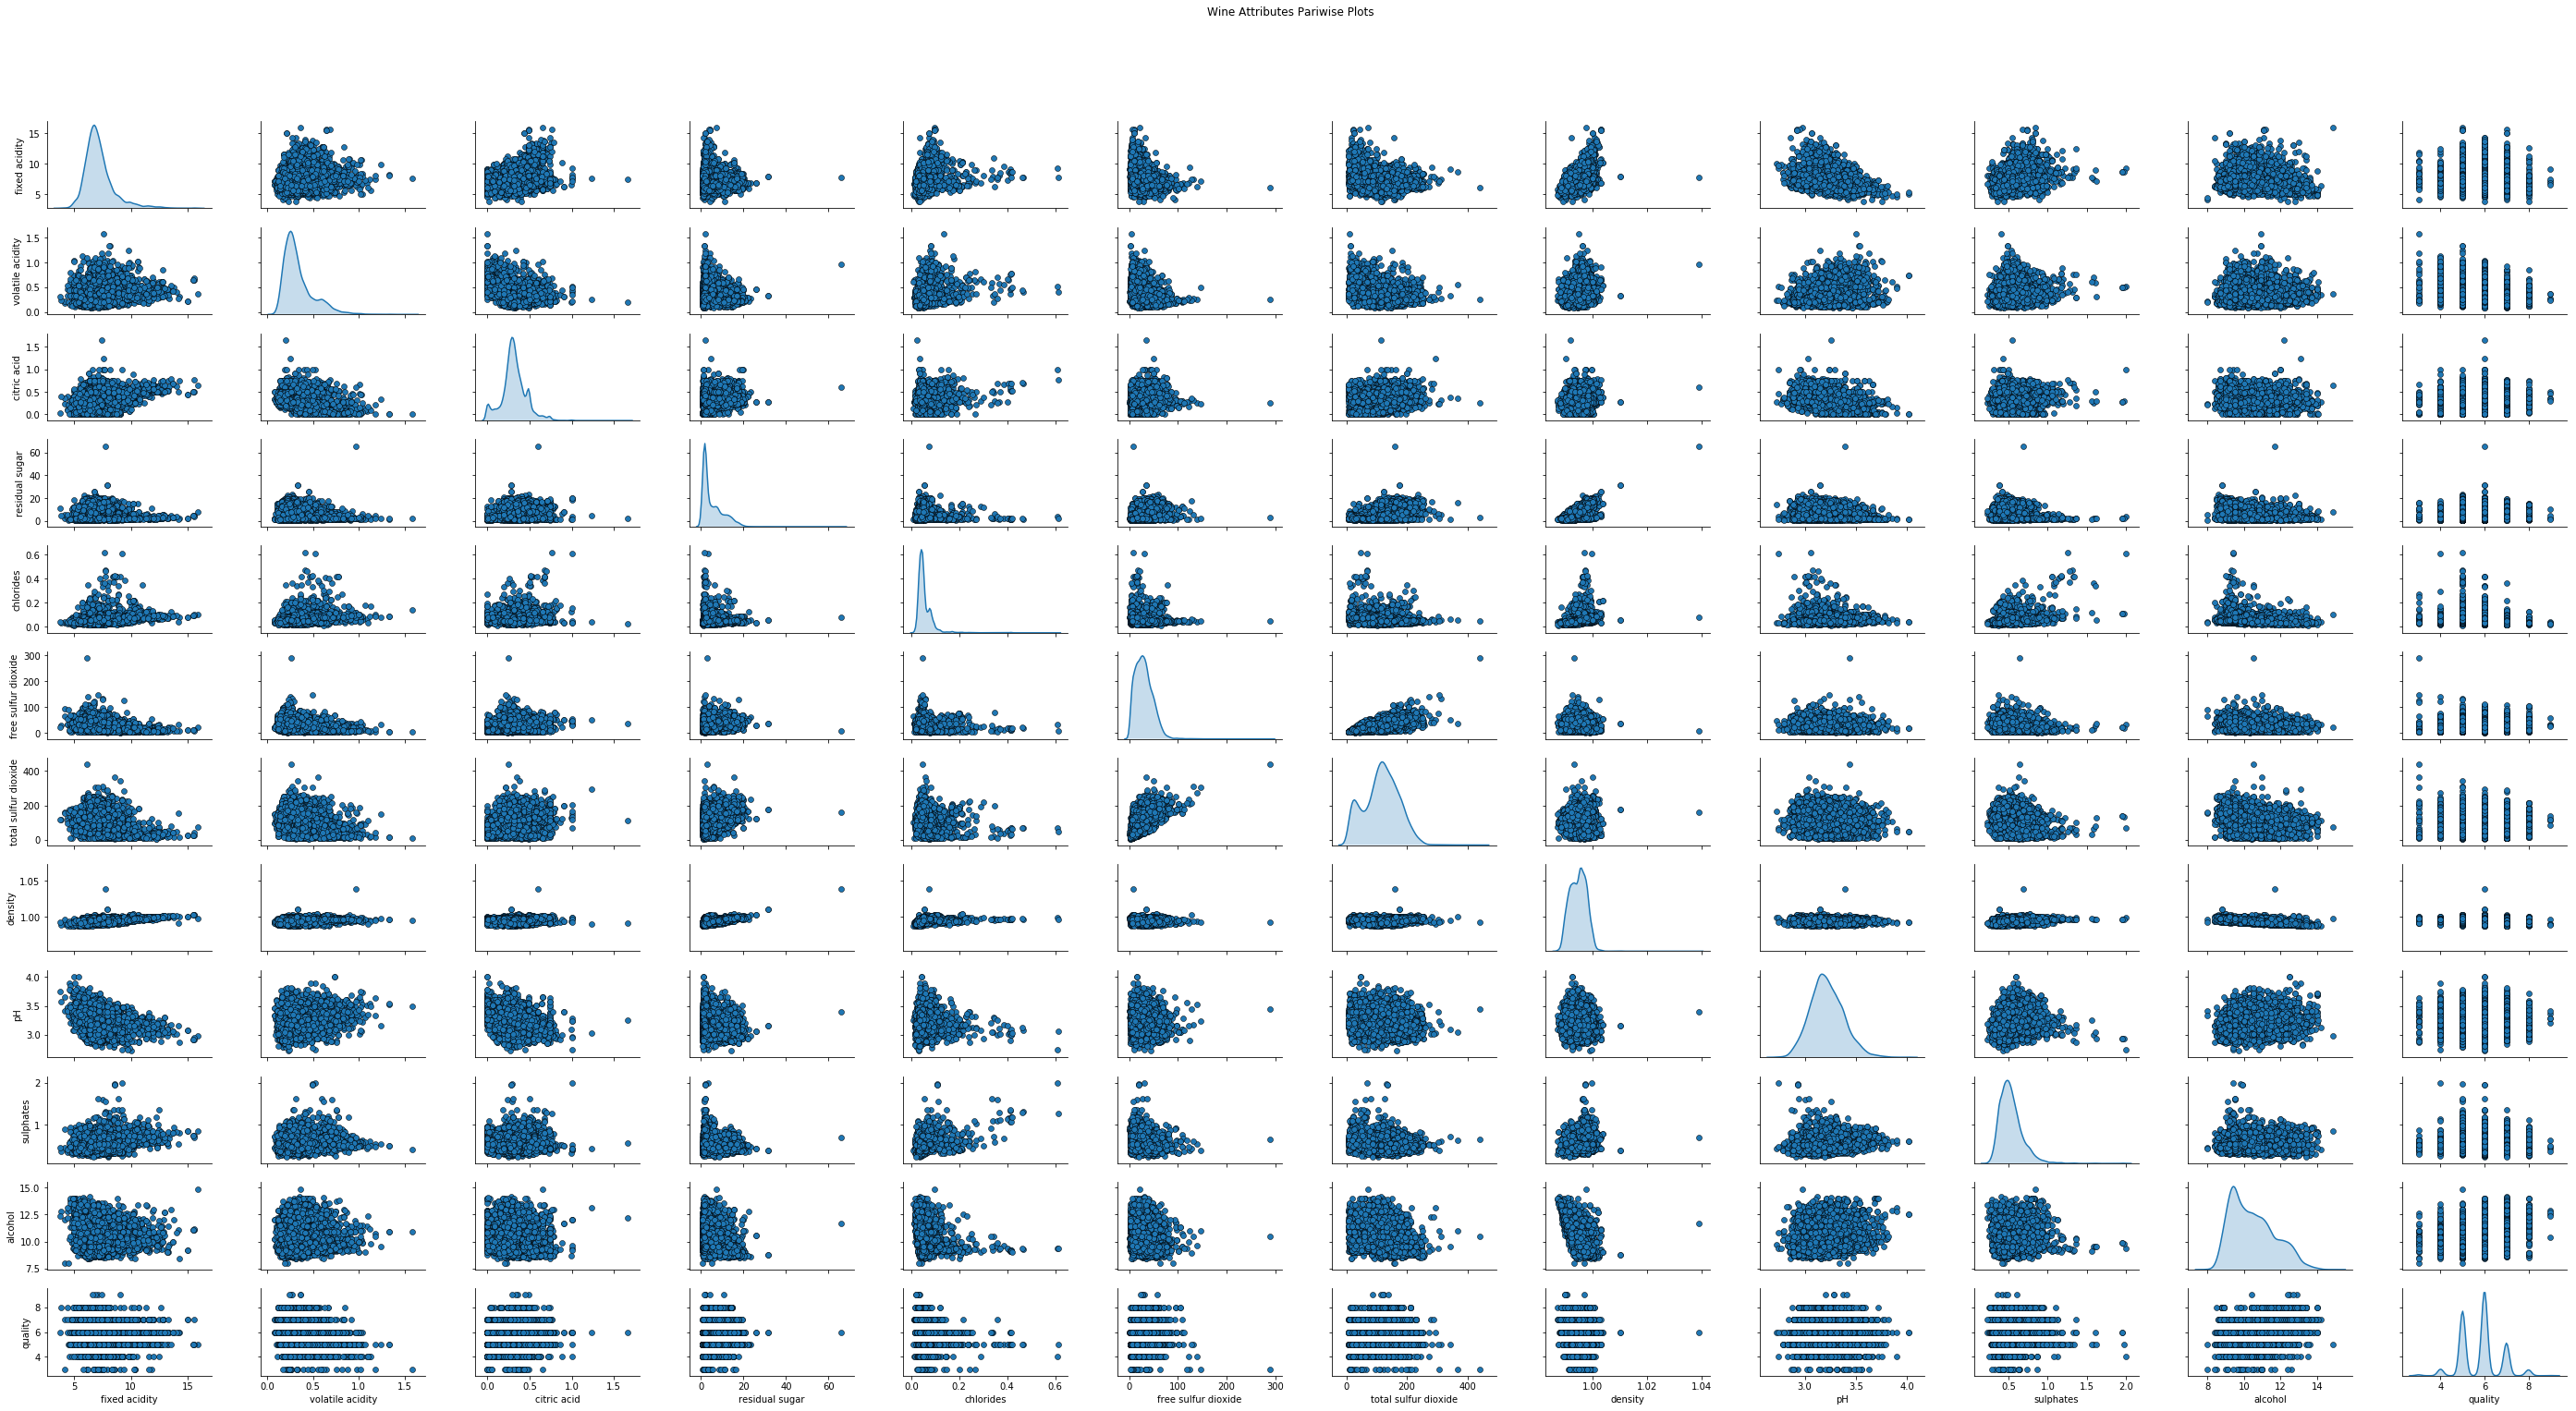

In [13]:
pp = sns.pairplot(wines,size=1.8,aspect=1.8,
             plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
fig = pp.fig
fig.subplots_adjust(top = 0.9, wspace = 0.3)
t = fig.suptitle('Wine Attributes Pariwise Plots')

## Parallel Co-ordinates

look into it at https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

## Scatter in pyplot vs joint in seaborn

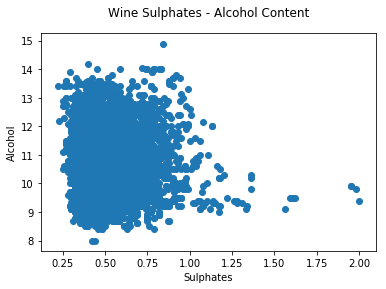

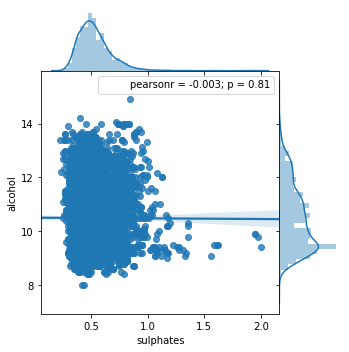

In [14]:
#Scatter vs joint plot
plt.scatter(wines['sulphates'],wines['alcohol'])  
plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)


# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)

## Stacked or multiple bars using seaborn (countplot)

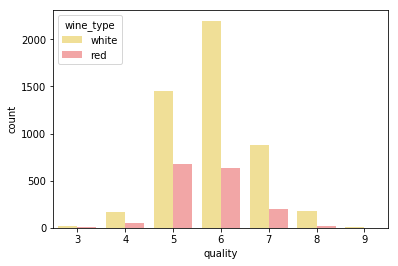

In [15]:
cp = sns.countplot(x= 'quality',hue = 'wine_type',data=wines,
                   palette={"red": "#FF9999", "white": "#FFE888"})

## Multiple Histograms
searborn.FacetGrid

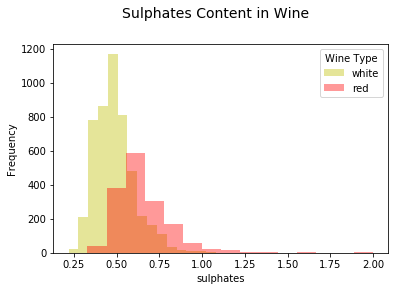

In [16]:
fig = plt.figure(figsize = (6, 4))

title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
ax.legend(title='Wine Type')
plt.close(2)

## Box plots (seaborn.boxplot)

Text(0,0.5,'Wine Alcohol %')

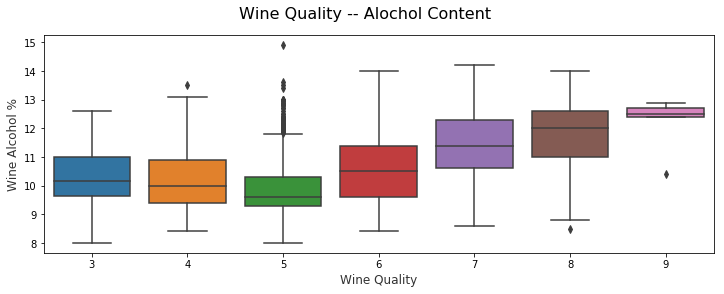

In [17]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality -- Alochol Content ', fontsize = 16)
sns.boxplot(x = 'quality', y ='alcohol', data=wines, ax = ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

# 3-D plots

## Scatter plot with third column

Text(0.5,0,'Alcohol')

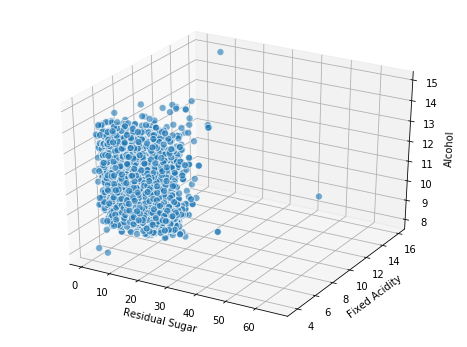

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

## Scatter plots
hight the value, larger the bubble

Text(0.5,1.05,'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

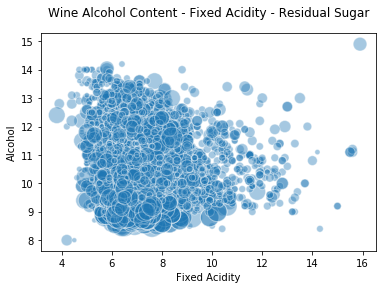

In [18]:
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)

## Factor plots using the facet (seaborn)

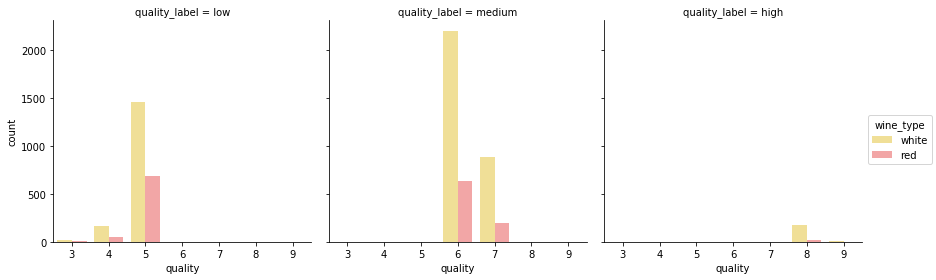

In [19]:
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

## Kernel density plot (seaborn)

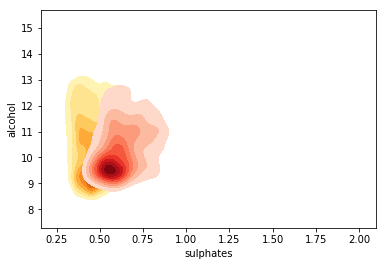

In [22]:
ax = sns.kdeplot(white_wine_dataset['sulphates'], white_wine_dataset['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine_dataset['sulphates'], red_wine_dataset['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False)

## Box plot with hue vlaue to set the 3-d variable

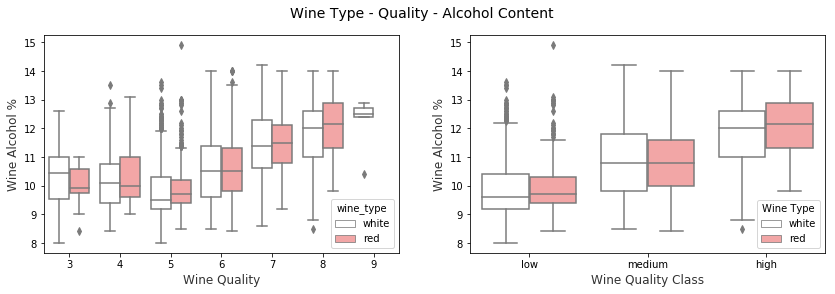

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')